In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
news = pd.read_csv("C:\\Users\\siddu\\OneDrive\\Documents\\datasets\\news.zip")
news.shape
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [21]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
news['title'] = label_en.fit_transform(news['title'])
news['text'] = label_en.fit_transform(news['text'])
news['label'] = label_en.fit_transform(news['label'])


In [23]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  6335 non-null   int64
 1   title       6335 non-null   int32
 2   text        6335 non-null   int32
 3   label       6335 non-null   int32
dtypes: int32(3), int64(1)
memory usage: 123.9 KB


In [24]:
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [25]:
labels = news.label
labels.head()

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int32

In [26]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(news['text'], labels, test_size=0.2, random_state=7)

In [30]:
print(x_train)

6237    4715
3722    6055
5774    3528
336     1144
3622    2797
        ... 
5699      96
2550    2747
537      866
1220    3094
4271    2713
Name: text, Length: 5068, dtype: int32


In [31]:
print(y_train)

6237    0
3722    0
5774    0
336     1
3622    1
       ..
5699    0
2550    1
537     1
1220    1
4271    1
Name: label, Length: 5068, dtype: int32


In [29]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


ValueError: could not convert string to float: 'The head of a leading survivalist group has made several shocking allegations about the United States government building secret, cavernous underground bunkers which are earmarked for use by the global elite in the case of an imminent apocalyptic event.\n\n\nA vast underground bunker under Denver Airport is ready for use by the global elite \n\nRobert Vicino, head of the survival firm Vivos has claimed that officials from the United States have been building ‘deep underground shelters’ underneath the city of Denver for that past three decades. He claims that sources have deduced that these survival shelters have been a work in progress since 1983. The largest has space for 10,000 people who are members of the global elite. However, the general population has not be considered in these plans. "They do not have a plan for you and me, but they have a plan for themselves, ” said Vicino.\n\n\nThe secretive goings on underneath Denver Airport have often been the source of a great deal of speculation and is suspected to have links with the Illuminati. According to Vicino, it is, in fact, the entrance point of the secret complex which is connected to Washington DC by an underground high-speed train.\n\nVicino believes that the apocalyptic event the global elite have been for is imminent. "You have to ask yourself, why did Russia just have a drill for 40 million people?" he asked. But the answer might not be what people suspect. According to Vicino, the threat will not come from nuclear war but from the arrival of Planet X (also known as Nibiru) which will arrive in September 2017. When Niribu comes close to Earth, it will compromise the integrity of the naturally occurring magnetic shield around the planet, leaving the surface highly vulnerable to showers of debris and toxic radiation rays . \n\nWhen questioned why the government had not forewarned the general public about this threat to the world, Vicino replied, "No government in the world is going to tell you about something life threatening unless they have a solution for you because otherwise, its going to cause a social meltdown.”\n\n\nVicino recognized that his warning was bound to attract condemnation and ridicule, but he said that he would not be deterred. "People that think it’s crazy are the ones who have not spent any time doing research. It’s easy to say \'the sky is not blue\' if you have never done any research on what color the sky is. If you did not well read and sit there playing with iPhone and watching television, you are probably already a walking zombie, but they should not demean those people who have taken the time to deeply research this stuff, ” he said.\n\nThe "Evidence" \n\nDisclose TV SOURCE '

<Axes: >

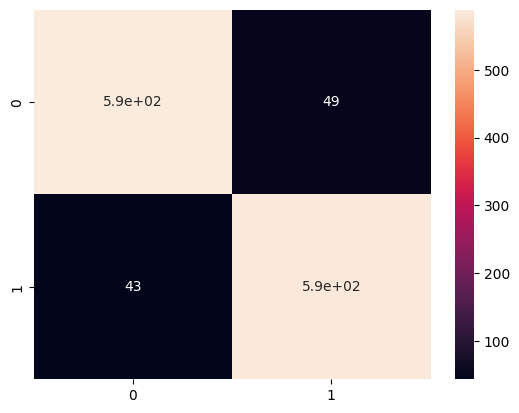

In [ ]:
#DataFlair - Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
sns.heatmap(cm,annot = True)